In [17]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
import os
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 110
epochs = 100
#------------------------------
#read kaggle facial expression recognition challenge dataset (fer2013.csv)
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

with open("/content/drive/MyDrive/fer2013.csv") as f:
  content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#------------------------------
#construct CNN structure
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

#------------------------------
model.summary()

fit = True

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('/data/facial_expression_model_weights.h5') #load weights
	
#------------------------------
"""
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])
"""
#------------------------------
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
#------------------------------


number of instances:  35888
instance length:  2304
28709 train samples
3589 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
activation_18 (Activation)   (None, 46, 46, 64)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
dropout_6 (Dropout)          (None, 21, 21, 128)       0         
_______________________________

In [19]:
#Saving the model
model.save('model25.h5')

In [20]:
#Evaluation
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.06399524211883545
Train accuracy: 97.7428674697876
Test loss: 2.3036837577819824
Test accuracy: 58.17776322364807


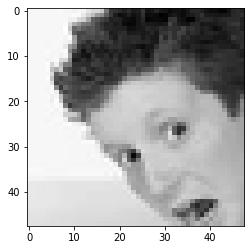

[5.3416288e-01 1.1753823e-05 5.0866132e-04 3.6090427e-05 1.0885177e-01
 8.9427497e-04 3.5553458e-01]


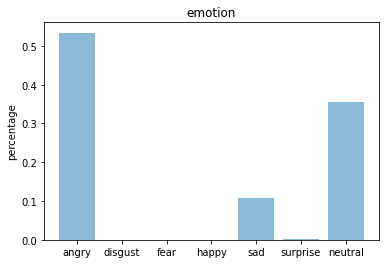

----------------------------------------------


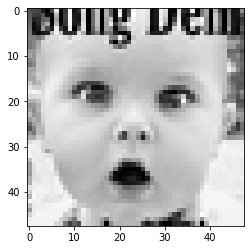

[3.8672683e-06 3.9257327e-07 5.2428778e-08 8.0854625e-06 1.4483666e-08
 9.9998760e-01 5.3904262e-08]


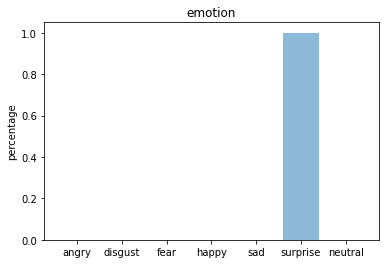

----------------------------------------------


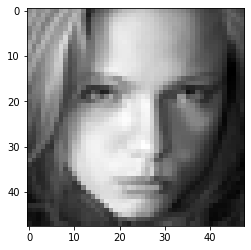

[4.3804827e-01 3.1186955e-04 1.7397340e-05 3.3716203e-03 2.0668928e-02
 1.1777063e-05 5.3757012e-01]


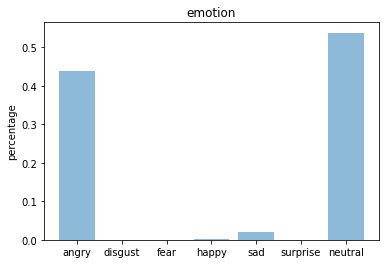

----------------------------------------------


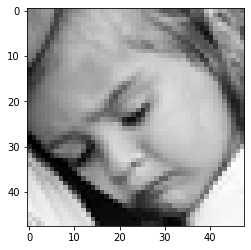

[4.0383593e-04 3.6952440e-06 1.8939047e-05 7.8491494e-02 8.6311007e-01
 1.0784902e-06 5.7971019e-02]


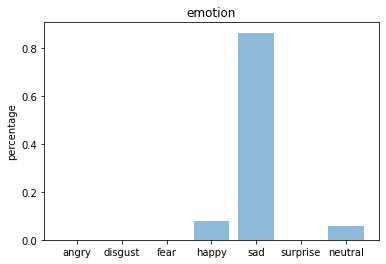

----------------------------------------------


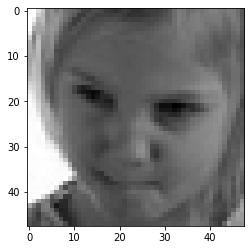

[1.3084903e-01 1.3370079e-03 5.0172089e-03 1.7330264e-04 2.4263454e-03
 1.2404396e-03 8.5895669e-01]


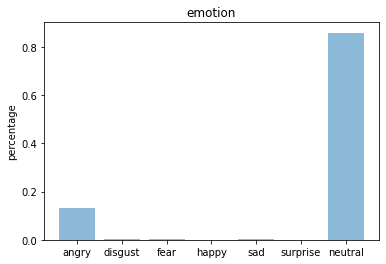

----------------------------------------------


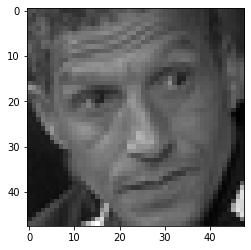

[0.40343237 0.21551175 0.01735577 0.00058531 0.2483903  0.00888385
 0.10584068]


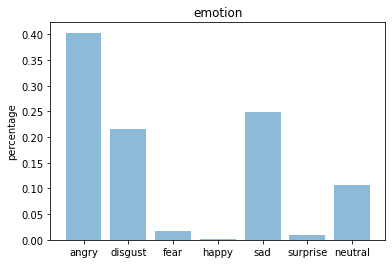

----------------------------------------------


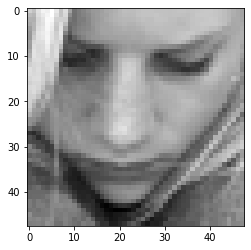

[2.9459165e-05 4.8040342e-06 1.6016871e-03 9.8751210e-05 9.9415511e-01
 6.7155514e-07 4.1095456e-03]


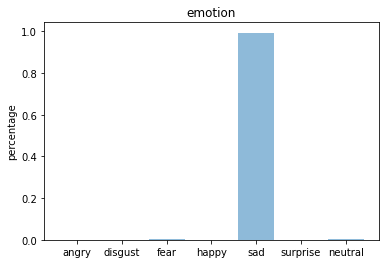

----------------------------------------------


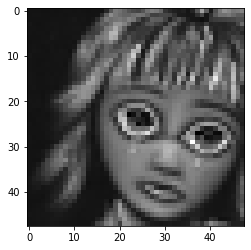

[1.7091084e-03 6.2175684e-05 2.4037308e-01 1.8139508e-01 2.1737930e-01
 3.5899490e-01 8.6355569e-05]


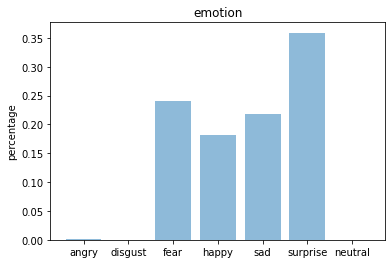

----------------------------------------------


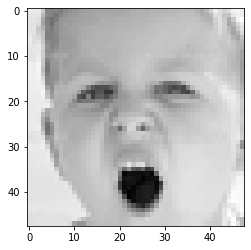

[1.1027016e-02 1.4782275e-06 1.1103611e-04 3.2633462e-04 1.8608433e-05
 9.8851049e-01 4.9019282e-06]


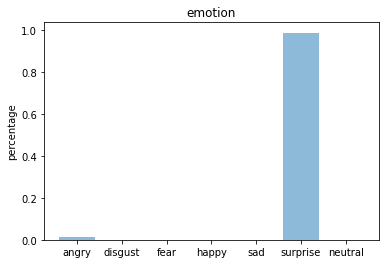

----------------------------------------------


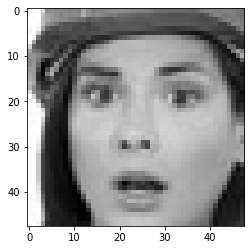

[3.7841194e-06 3.4967591e-06 1.4731836e-05 4.6507392e-08 1.0200290e-05
 9.9996090e-01 6.8276217e-06]


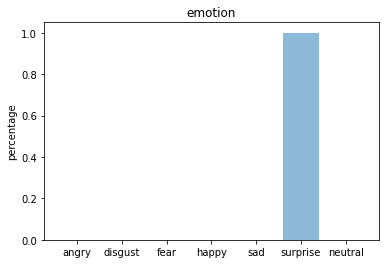

----------------------------------------------


In [21]:

monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

In [14]:
#Confusion Matrix.

from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = [];
 
for i in predictions:
 
  pred_list.append(np.argmax(i))
 
for i in y_test:
 
  actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)

array([[232,   0,  74,  41,  60,  10,  50],
       [ 35,   0,  13,   4,   2,   0,   2],
       [ 45,   0, 238,  26,  95,  29,  63],
       [ 27,   0,  22, 734,  33,  22,  57],
       [ 81,   0,  93,  48, 325,   9,  97],
       [ 11,   0,  65,  27,   3, 293,  16],
       [ 65,   0,  53,  67, 109,   7, 306]])